In [9]:
import pandas as pd
import numpy as np

In [10]:
dataset = pd.read_csv("twitter_data.csv")

In [11]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [12]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [14]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [15]:
dataset["labels"]= dataset["class"].map({0:"Hatespeech",
                                        1:"Offensive Language",
                                        2:"Neither"})

In [16]:
dataset


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",Neither
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [17]:
data = dataset[["tweet","labels"]]

In [18]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,Neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",Neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [19]:
import re
import nltk

In [20]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
#importing stopwords, stopwords are insignificant words like is as am etc
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [22]:
#impoting Stemming, Stemming in getting words back to thier orignal form
stemmer = nltk.SnowballStemmer("english")

In [34]:
# Data Cleaning
def clean_data(text):
    text = str(text).lower()
    text = re.sub(r'https?:/www/\S+|\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    
    # Stopwords Removal
    text = [word for word in text.split() if word not in stopwords]
    text = ' '.join(text)
    
    # Stemming text
    text = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(text)
    
    return text


data["tweet"] = data["tweet"].apply(clean_data)

# Display the cleaned data
print(data.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               tweet              labels
0  rt mayasolov woman shouldnt complain clean hou...             Neither
1  rt mleew17 boy dat coldtyga dwn bad cuffin dat...  Offensive Language
2  rt urkindofbrand dawg rt 80sbaby4lif ever fuck...  Offensive Language
3             rt cganderson vivabas look like tranni  Offensive Language
4  rt shenikarobert shit hear might true might fa...  Offensive Language


C:\Users\Aryan\AppData\Local\Temp\ipykernel_12968\1671235866.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [35]:
X = np.array(data["tweet"])
Y = np.array(data["labels"])

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [44]:
cv = CountVectorizer()
X = cv.fit_transform(X)


In [45]:
X

<24783x33741 sparse matrix of type '<class 'numpy.int64'>'
	with 212067 stored elements in Compressed Sparse Row format>

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [48]:
X_train

<16604x33741 sparse matrix of type '<class 'numpy.int64'>'
	with 142188 stored elements in Compressed Sparse Row format>

In [49]:
#building ml model
from sklearn.tree import DecisionTreeClassifier


In [50]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [52]:
Y_pred = dt.predict(X_test)

In [57]:
# confusion Matrix and accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm



array([[ 163,   49,  253],
       [  37, 1174,  168],
       [ 256,  250, 5829]], dtype=int64)

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

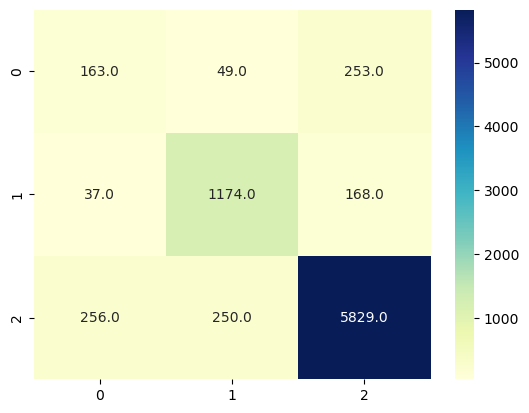

In [63]:
sns.heatmap(cm, annot= True, fmt=".1f", cmap="YlGnBu")


In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.87614622814525

In [67]:
sample= "lets unite and kill all the people who are prtesting against the goverment"
sample = clean_data(sample)

In [68]:
sample

'let unit kill peopl prtest gover'

In [71]:
data1 = cv.transform([sample]).toarray()

In [72]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
dt.predict(data1)

array(['Offensive Language'], dtype=object)